# Tarea 01 Ciencia de Redes MII
Christian Ivani

1. Modelo $G_{n,p}$. En el modelo **Erdős-Rényi**, cada par de nodos se une a través de una arista con una probabilidad $p$. Considere un conjunto de nodos $V$ de tamaño $n=100$. Considere 100 valores para $p$ entre 0 y 1. 

## - Implementación del modelo $G_{n,p}$. 

In [1]:
import statistics
import random
import networkx as nx
import matplotlib.pyplot as plt
from networkx.generators.random_graphs import erdos_renyi_graph
import numpy as np
import collections

In [4]:
class Vertice:
   def __init__(self, index):
      self.index = index
      self.neighbors = []
 
   def __repr__(self):
      return repr(self.index)


def erdosRenyi(n,p):
   vertices = [Vertice(i) for i in range(n)]
   aristas = [(i,j) for i in range(n) for j in range(i) if random.random() < p]
 
   for (i,j) in aristas:
      vertices[i].neighbors.append(vertices[j])
      vertices[j].neighbors.append(vertices[i])
 
   return vertices,aristas

## Primera gráfica con 80 nodos y una probabilidad de 0.1

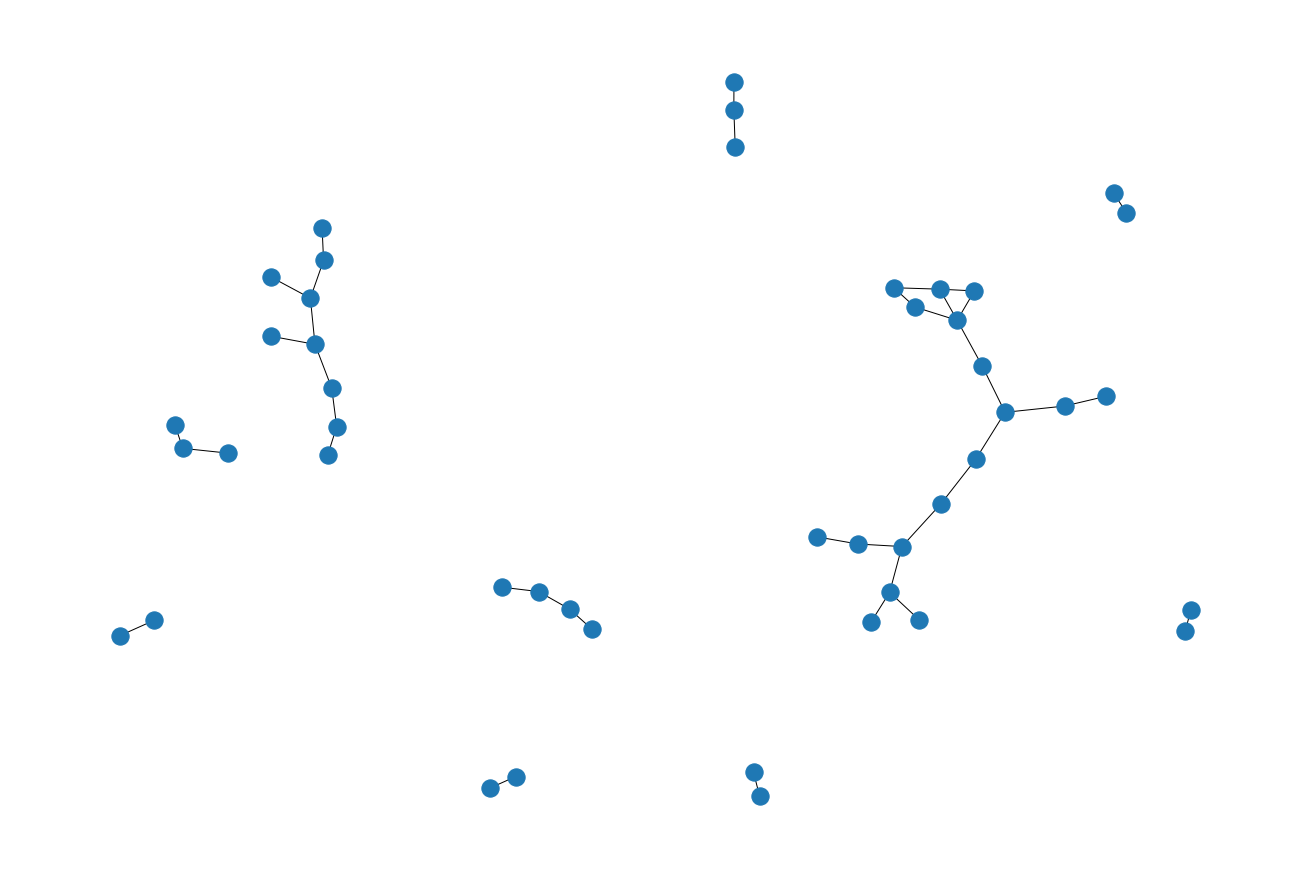

In [58]:
N = 80 # Cantidad de nodos
P = 0.01
##Generamos una primera gráfica de ER.
grafica1=erdosRenyi(N,P)
aristas1 = grafica1[1]
## Convertimos la lista de aristas en una gráfica de networkx.
G1 = nx.Graph()  
G1.add_edges_from(aristas1)
nx.info(G1)
plt.figure(figsize=(18,12))
nx.draw(G1)
plt.savefig('graphER1.pdf')

## Siguientes 4 graficas con 80 nodos y probabilidades distintas

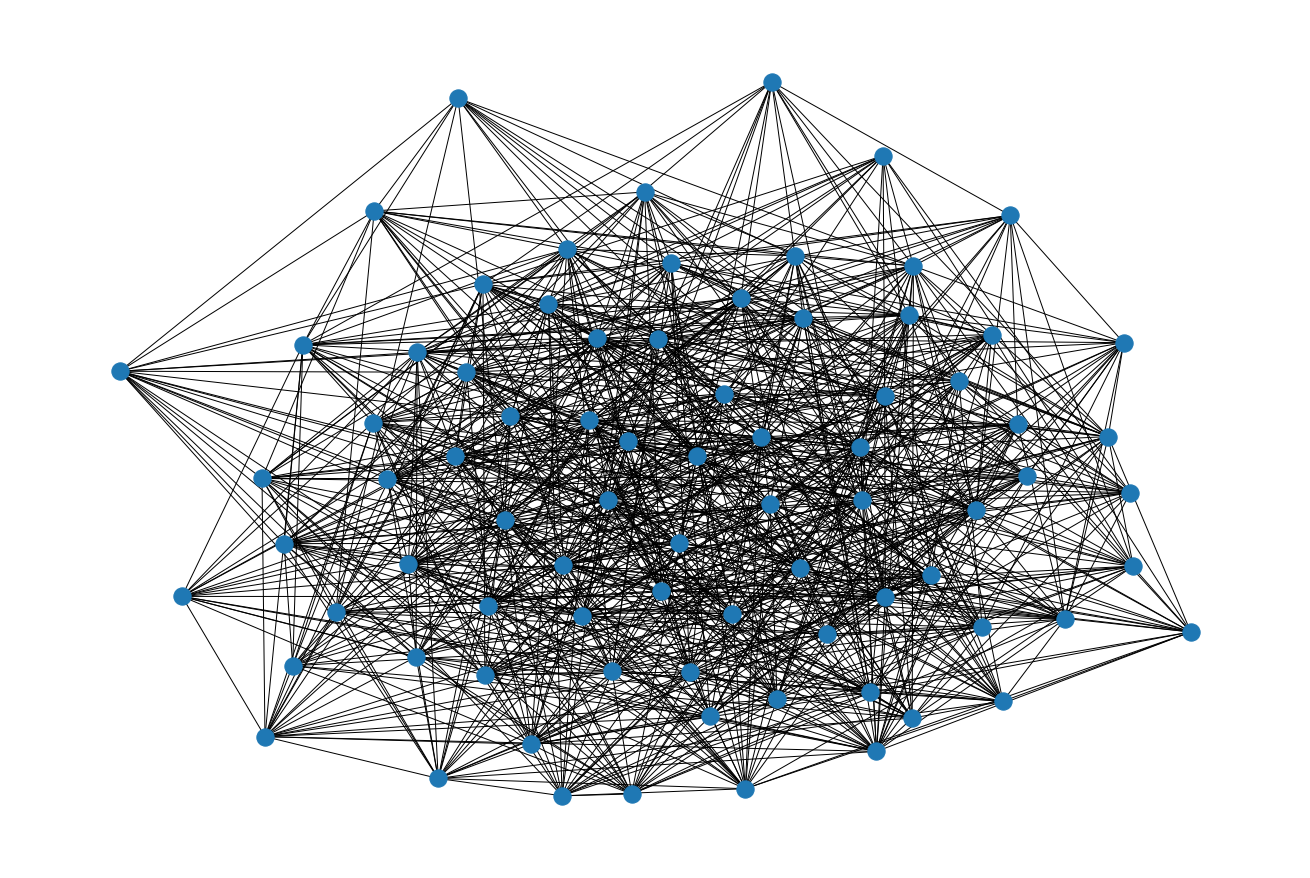

In [27]:
P = 0.3 
##Generamos una primera gráfica de ER.
grafica2=erdosRenyi(N,P)
aristas2 = grafica2[1]
## Convertimos la lista de aristas en una gráfica de networkx.
G2 = nx.Graph()  
G2.add_edges_from(aristas2)
nx.info(G2)
plt.figure(figsize=(18,12))
nx.draw(G2)
plt.savefig('graphER2.pdf')

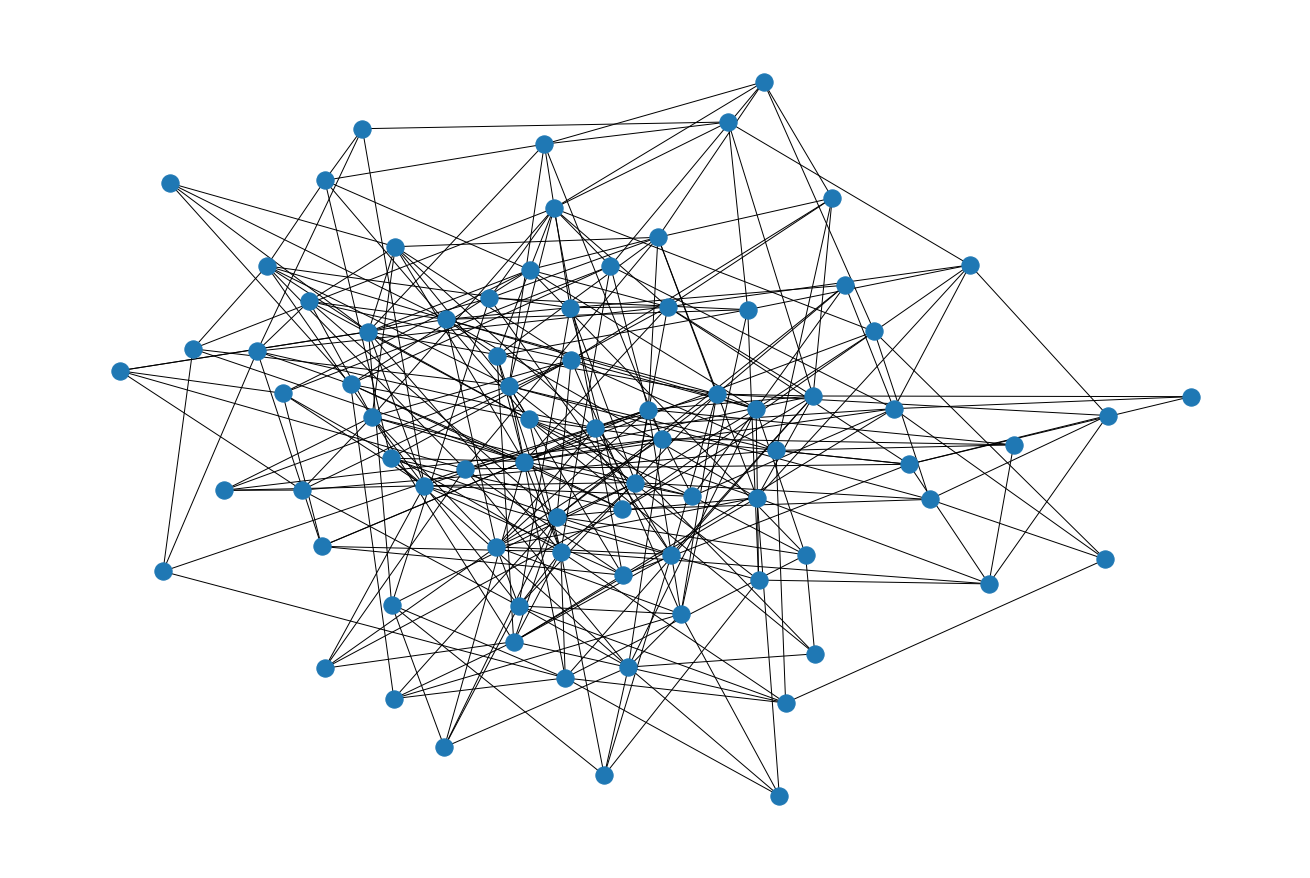

In [28]:
P = 0.1 
##Generamos una primera gráfica de ER.
grafica3=erdosRenyi(N,P)
aristas3 = grafica3[1]
## Convertimos la lista de aristas en una gráfica de networkx.
G3 = nx.Graph()  
G3.add_edges_from(aristas3)
nx.info(G3)
plt.figure(figsize=(18,12))
nx.draw(G3)
plt.savefig('graphER3.pdf')

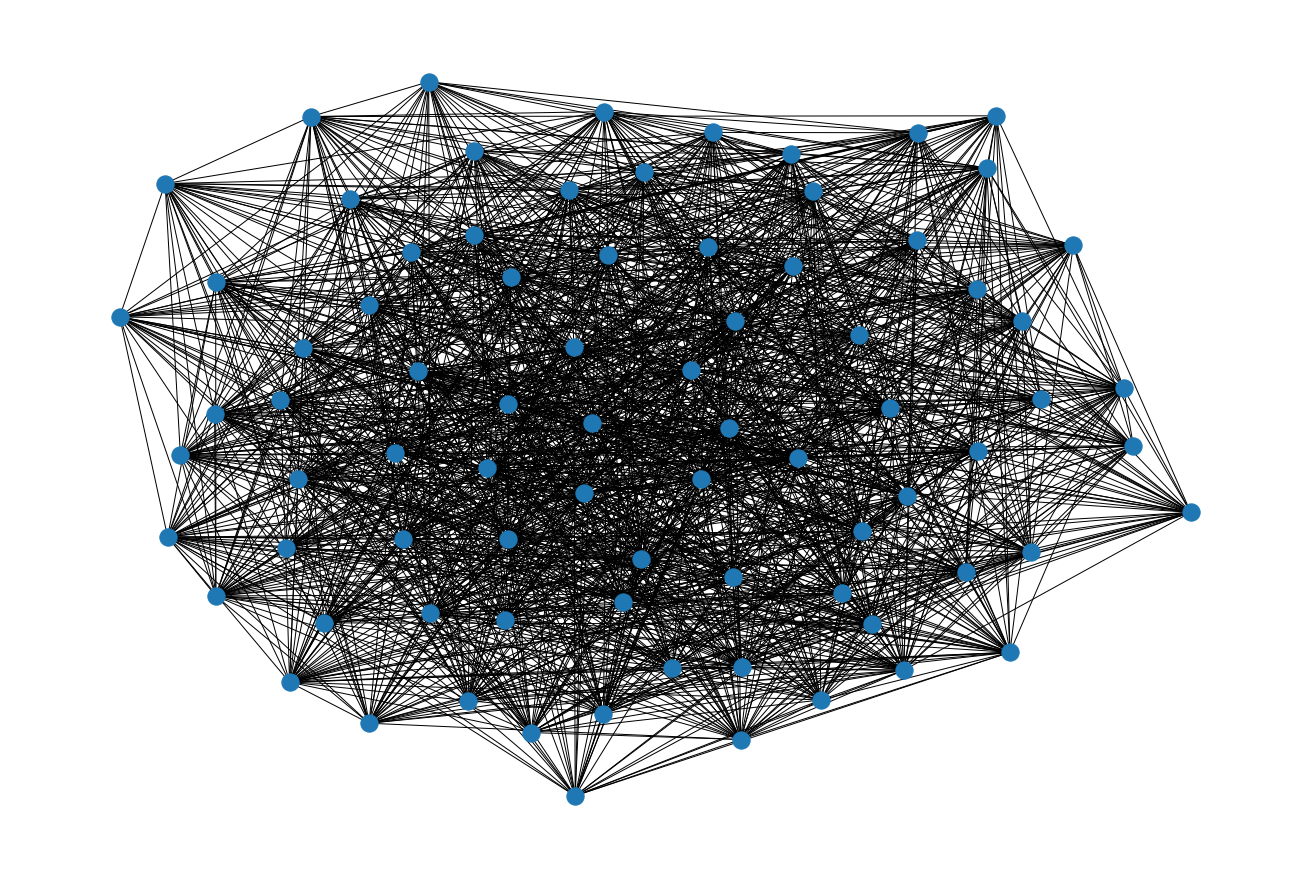

In [9]:
P = 0.5 
##Generamos una primera gráfica de ER.
grafica4=erdosRenyi(N,P)
aristas4 = grafica4[1]
## Convertimos la lista de aristas en una gráfica de networkx.
G4 = nx.Graph()  
G4.add_edges_from(aristas4)
nx.info(G4)
plt.figure(figsize=(18,12))
nx.draw(G4)
plt.savefig('graphER4.pdf')

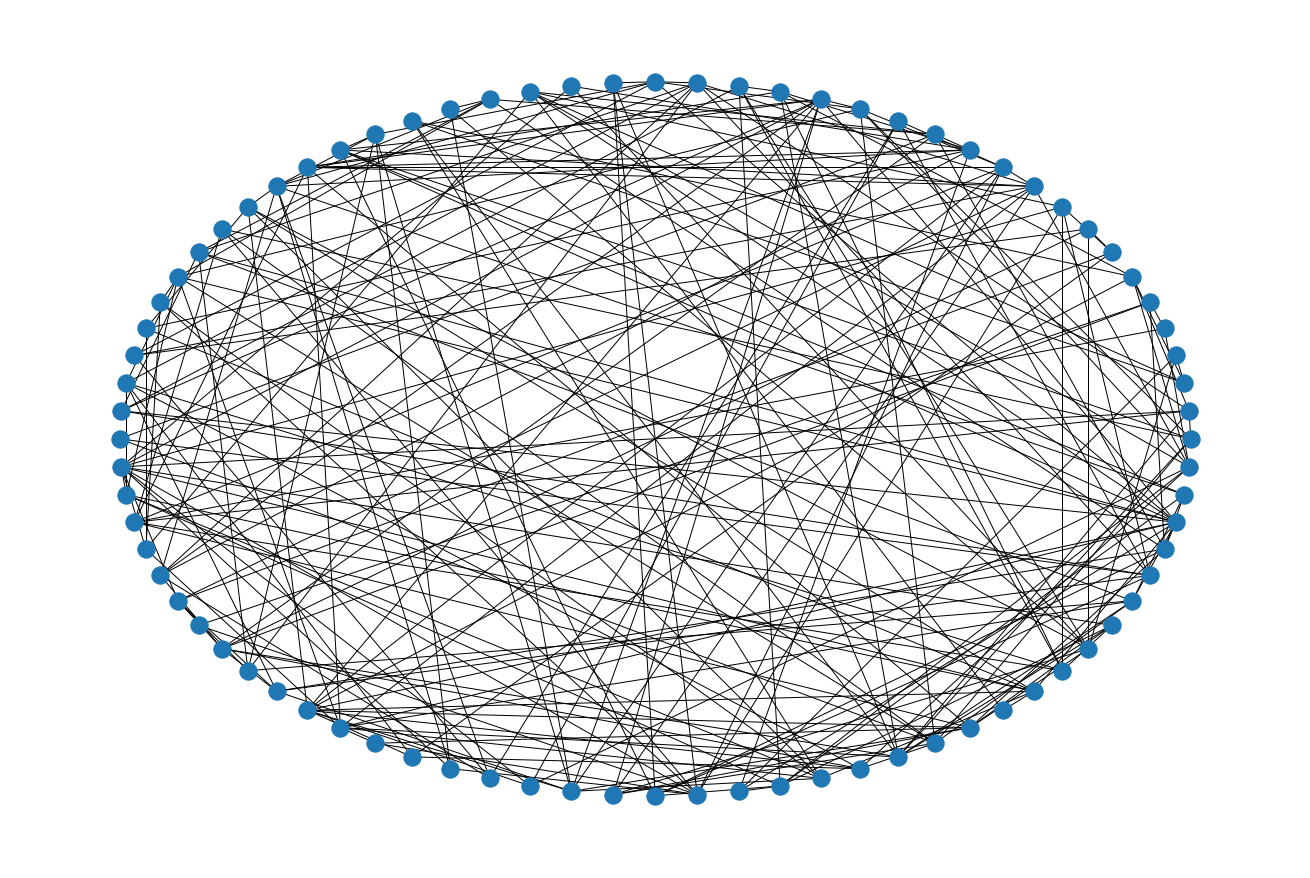

In [11]:
P = 0.08 
##Generamos una primera gráfica de ER.
grafica5=erdosRenyi(N,P)
aristas5 = grafica5[1]
## Convertimos la lista de aristas en una gráfica de networkx.
G5 = nx.Graph()  
G5.add_edges_from(aristas5)
nx.info(G5)
plt.figure(figsize=(18,12))
nx.draw_circular(G5)
plt.savefig('graphER5.pdf')

## Cálculos solicitados 

In [59]:
nx.number_connected_components(G1)

10

In [60]:
largest_cc = max(nx.connected_components(G1), key=len)
print(len(largest_cc))
largest_cc = max(nx.connected_components(G2), key=len)
print(len(largest_cc))
largest_cc = max(nx.connected_components(G5), key=len)
print(len(largest_cc))

17
80
80


Calculo del camino mínimo promedio de la componente conexa más grande en función de  𝑝.

In [61]:
Short_cc = min(nx.connected_components(G1), key=len)
print(len(Short_cc))
Short_cc = min(nx.connected_components(G2), key=len)
print(len(Short_cc))
Short_cc = min(nx.connected_components(G5), key=len)
print(len(Short_cc))

2
80
80


Calcule la densidad en función de  𝑝 .

17


4.220588235294118

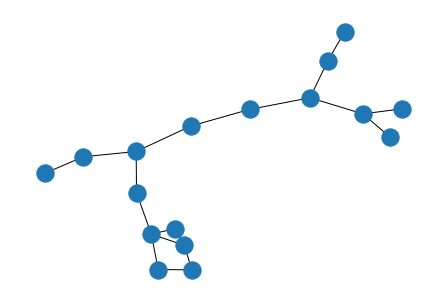

In [62]:
# PRimero ,obtenemos un nuevo Grafo a partir de un subgrafo de G1
S1 = G1.subgraph(max(nx.connected_components(G1), key=len)).copy()
nx.draw(S1)
print(S1.number_of_nodes()) #Numero de nodos
nx.average_shortest_path_length(S1) #Longitud de ruta más corta promedio.

In [64]:
nx.density(S1)

0.1323529411764706

In [65]:
nx.density(G1)

0.03671497584541063

In [66]:
ST = [G1.subgraph(c).copy() for c in nx.connected_components(G1)]
ST

In [67]:
for r in ST:
    print(nx.density(r))

0.1323529411764706
0.6666666666666666
0.2222222222222222
0.6666666666666666
1.0
0.5
1.0
1.0
1.0
1.0


In [68]:
# Coeficiente de agrupamiento promedio para el gráfico G1.
print(nx.average_clustering(G1))

0.03260869565217391


In [69]:
# Calculado para cada subgrafo9 del grafo G1
for r in ST:
    print(nx.average_clustering(r))

0.08823529411764706
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


## Conclusiones

# Analisis de grafo real

Un **grafo real!** El archivo "knn-graph-south-america.p" contiene en formato pickle (pueden usar "pickle.load(open('knn-graph-south-america.p','rb'))" para abrirlo) un grafo, que llamaremos $G_{SA}$, construido de la siguiente forma:

- A partir de datos [tipológicos](https://sails.clld.org), obtuvimos información acerca de 88 lenguas de Sudamérica. Cada lengua es representada por 9 rasgos. 
- Con una famosa definición de [distancia](https://en.wikipedia.org/wiki/Hamming_distance), determinamos los $k$-vecinos cercanos de cada lengua. Fijamos $k=5$.
- Con esto, cada lengua se conecta con las $k$ lenguas más cercanas.

## Revisemos datos del grafo real importando el archivo 

In [71]:
import pickle
GR =  pickle.load(open('knn-graph-south-america.p','rb'))

In [81]:
n = GR.number_of_nodes()
v = GR.number_of_edges()
print(n,v)
print(nx.number_connected_components(GR))
largest_cc = max(nx.connected_components(GR), key=len)
Short_cc = min(nx.connected_components(GR), key=len)
print(len(largest_cc),len(Short_cc))
print(nx.average_shortest_path_length(GR))
print(nx.density(GR))
print(nx.average_clustering(GR))

88 365
1
88 88
5.018808777429467
0.09535005224660396
0.7277791420434961


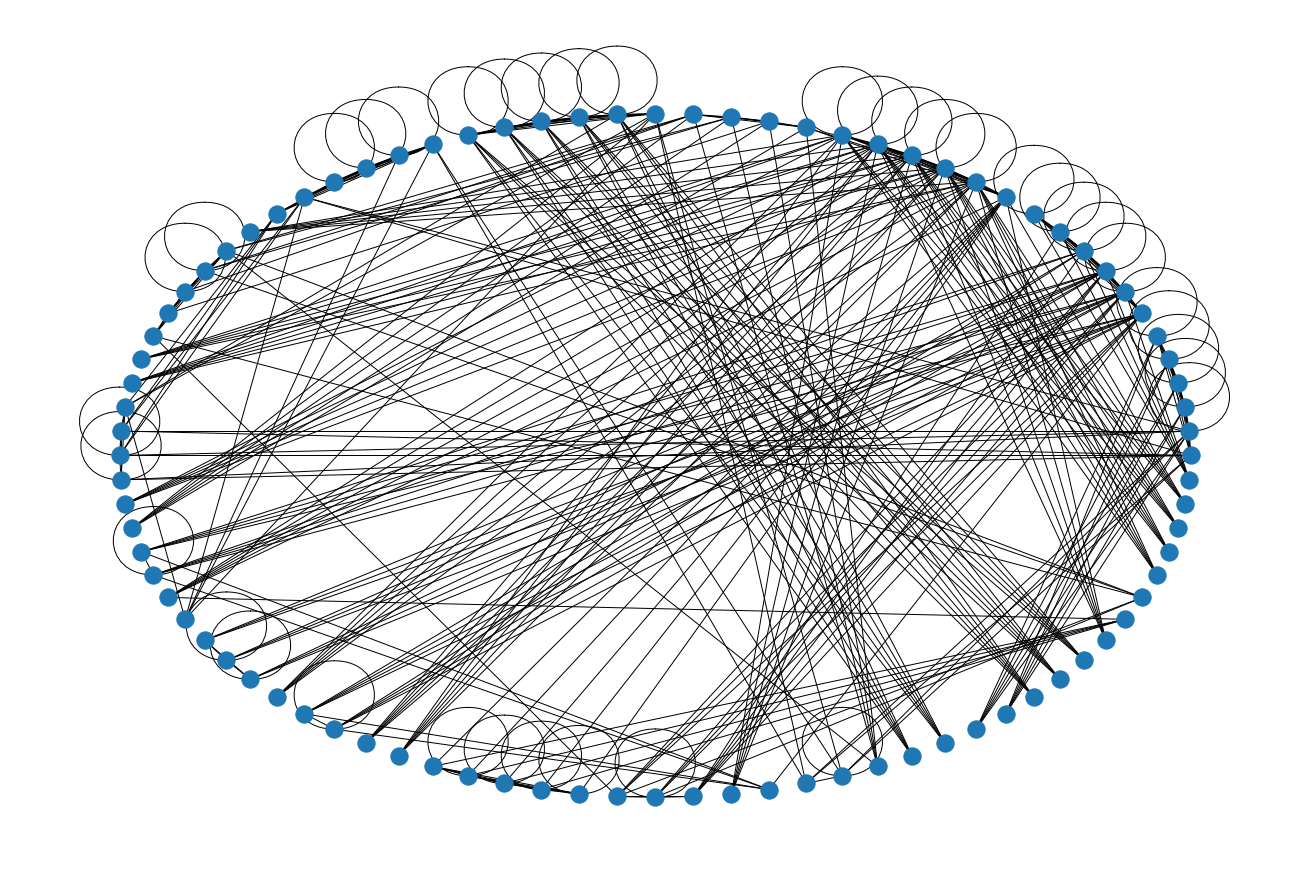

In [75]:
plt.figure(figsize=(18,12))
nx.draw_circular(GR)
plt.savefig('GrafoRealCircular.pdf')

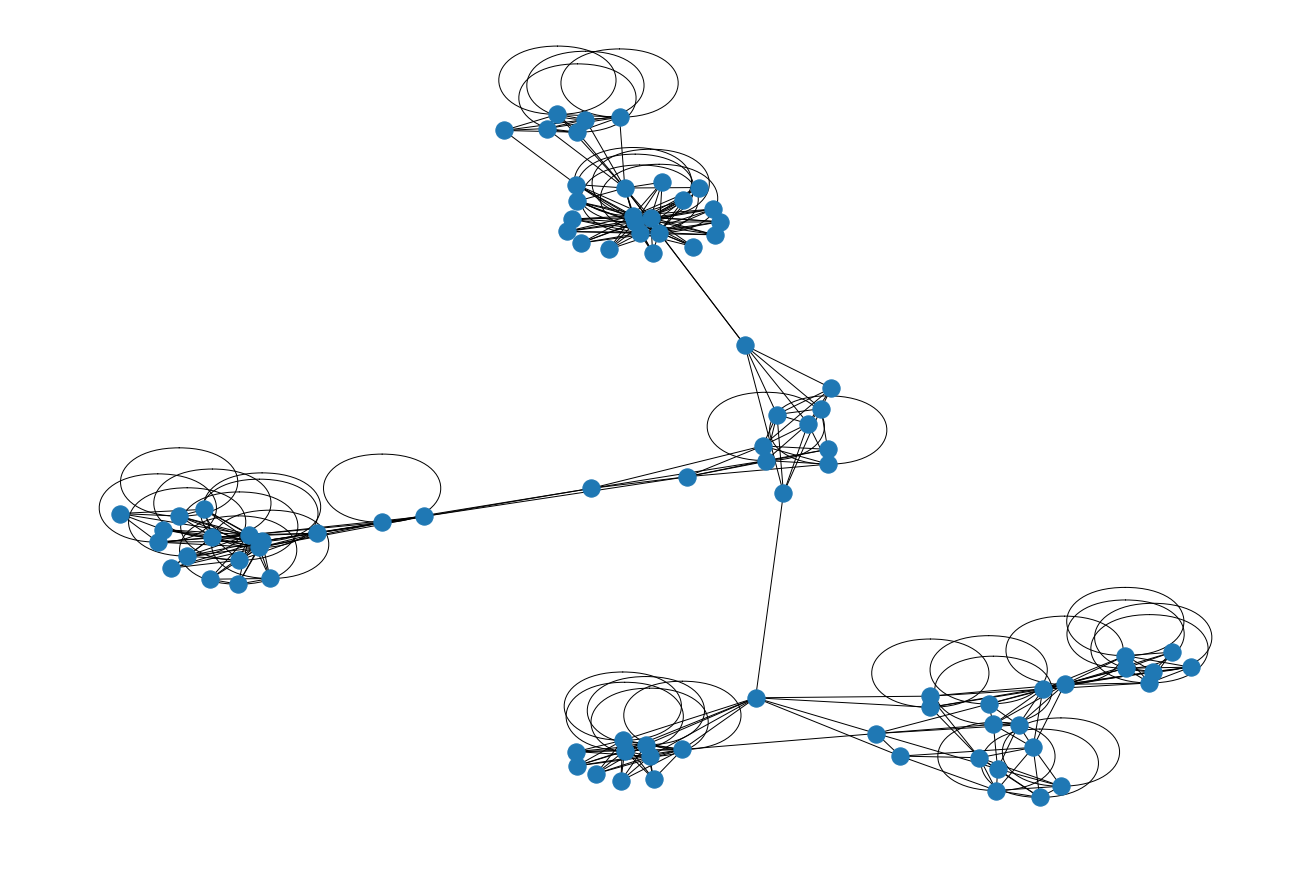

In [76]:
plt.figure(figsize=(18,12))
nx.draw(GR)
plt.savefig('GrafoReal.pdf')

## Construcción de 100 grafos con datos de GR

Primero creamos una matriz [1x100] para valores de p que van desde el 0,01 hast el 1,00. Laidea es tener acotado los valores de p para el analisis posterior.

In [82]:
i=1
pes = []
for i in range(100):
    pes.append( 0.01 + 0.01*i) 

In [83]:
print(pes)
len(pes)

[0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.06999999999999999, 0.08, 0.09, 0.09999999999999999, 0.11, 0.12, 0.13, 0.14, 0.15000000000000002, 0.16, 0.17, 0.18000000000000002, 0.19, 0.2, 0.21000000000000002, 0.22, 0.23, 0.24000000000000002, 0.25, 0.26, 0.27, 0.28, 0.29000000000000004, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35000000000000003, 0.36000000000000004, 0.37, 0.38, 0.39, 0.4, 0.41000000000000003, 0.42000000000000004, 0.43, 0.44, 0.45, 0.46, 0.47000000000000003, 0.48000000000000004, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.5700000000000001, 0.5800000000000001, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.6900000000000001, 0.7000000000000001, 0.7100000000000001, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.8200000000000001, 0.8300000000000001, 0.8400000000000001, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.9400000000000001, 0.9500000000000001, 0.9600000000000001, 0.97, 0.98, 0.99, 1.0]


100

In [87]:
gs_list = []
for i in range(100):
    pp = pes[i]
    GS = erdos_renyi_graph(88,pp)
    ds = nx.density(GS)
    cc = nx.number_connected_components(GS)
    ac = nx.average_clustering(GS)
    edges = nx.number_of_edges(GS)
    gs_dict = {'Grafo': GS, 'Probabilidad': pp, 'Vertices' : edges, 'Densidad': ds, 'Comp. Conec': cc, 'Clustering' : ac}
    gs_list.append(gs_dict)

In [88]:
corte_edges = []
for i in range(100):
    dicc = gs_list[i]
    ver = dicc['Vertices']
    if ( 300 < ver < 450) :
        corte_edges.append(dicc)
    else:
        i+1
print(corte_edges)
len(corte_edges)

[{'Grafo': <networkx.classes.graph.Graph object at 0x0000021DFFEF6E50>, 'Probabilidad': 0.09, 'Vertices': 332, 'Densidad': 0.08672936259143156, 'Comp. Conec': 1, 'Clustering': 0.08650806264442627}, {'Grafo': <networkx.classes.graph.Graph object at 0x0000021DFFEF6D90>, 'Probabilidad': 0.09999999999999999, 'Vertices': 363, 'Densidad': 0.09482758620689655, 'Comp. Conec': 1, 'Clustering': 0.1036602286602286}, {'Grafo': <networkx.classes.graph.Graph object at 0x0000021DFFEF60A0>, 'Probabilidad': 0.11, 'Vertices': 386, 'Densidad': 0.10083594566353186, 'Comp. Conec': 1, 'Clustering': 0.08655769735315186}]


3

In [89]:
corte_densidad = []
for i in range(100):
    dicc = gs_list[i]
    den = dicc['Densidad']
    if (0.09 < den < 0.1) :
        corte_densidad.append(dicc)
    else:
        i+1
print(corte_densidad)        
len(corte_densidad)

[{'Grafo': <networkx.classes.graph.Graph object at 0x0000021DFFEF6D90>, 'Probabilidad': 0.09999999999999999, 'Vertices': 363, 'Densidad': 0.09482758620689655, 'Comp. Conec': 1, 'Clustering': 0.1036602286602286}]


1

In [93]:
gs01 = (gs_list[9])
grafosol = gs01['Grafo']
print(gs01)

{'Grafo': <networkx.classes.graph.Graph object at 0x0000021DFFEF6D90>, 'Probabilidad': 0.09999999999999999, 'Vertices': 363, 'Densidad': 0.09482758620689655, 'Comp. Conec': 1, 'Clustering': 0.1036602286602286}


In [94]:
print(nx.average_shortest_path_length(grafosol))

2.322884012539185


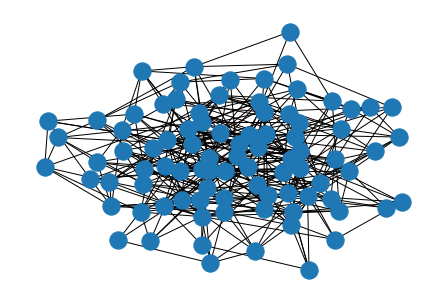

In [95]:
nx.draw(grafosol)

## Conclusiones

Se podría seguir trabajando y afinando entre el 0.09 y 0.1 de probabilidades para los 88 nodos.
Pero segun el modelo el p es 0.09 